In [2]:
import pandas as pd
import dlib
from pathlib import Path
import cv2
import matplotlib.pyplot as plt


class CFG:
    IMG_FOLDER_PATH = Path("./CelebA/img_celeba")
    IDENTITY_PATH = Path("./CelebA/Anno/identity_CelebA.txt")

In [3]:
%cd ..

/mnt/e/projects/face_recognition


In [4]:
if not CFG.IMG_FOLDER_PATH.exists():
    raise Exception("Ahtung! DATA folder not found!")

In [5]:
df_identity = pd.read_csv(CFG.IDENTITY_PATH, sep=" ", header=None).sort_values(by=1).reset_index(drop=True)
df_identity.columns = ["img_path", "label"]
df_identity.img_path = df_identity.img_path.map(lambda path: str(CFG.IMG_FOLDER_PATH / Path(path)))
df_identity.head(3)

,img_path,label
0,CelebA/img_celeba/027827.jpg,1
1,CelebA/img_celeba/108998.jpg,1
2,CelebA/img_celeba/051162.jpg,1


In [6]:
df_identity.iloc[list(range(25000, 25025)), :]

,img_path,label
25000,CelebA/img_celeba/011388.jpg,1187
25001,CelebA/img_celeba/110488.jpg,1187
25002,CelebA/img_celeba/153445.jpg,1187
25003,CelebA/img_celeba/015324.jpg,1187
25004,CelebA/img_celeba/102913.jpg,1187
25005,CelebA/img_celeba/125797.jpg,1187
25006,CelebA/img_celeba/021677.jpg,1187
25007,CelebA/img_celeba/045550.jpg,1187
25008,CelebA/img_celeba/061404.jpg,1187
25009,CelebA/img_celeba/088813.jpg,1187


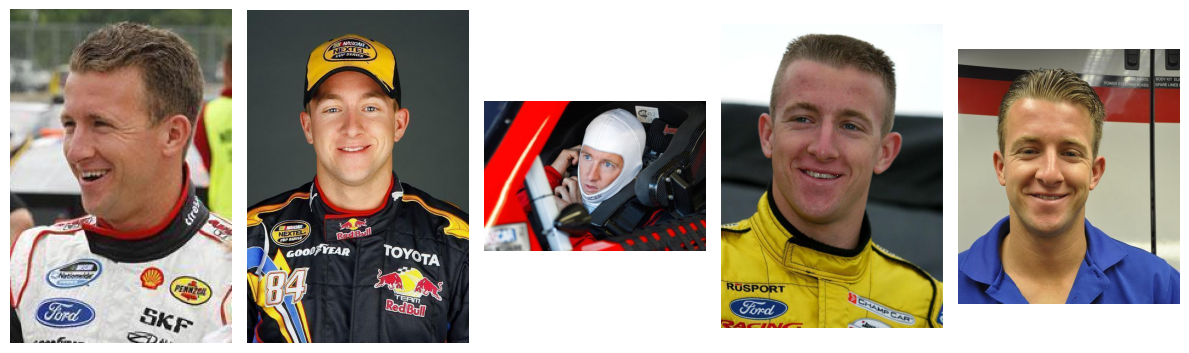

In [24]:
def display_image_grid(images_filepaths, cols=5):
    rows = len(images_filepaths) // cols
    _, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 6))
    for i, image_filepath in enumerate(images_filepaths):
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.ravel()[i].imshow(image)
        ax.ravel()[i].set_axis_off()
    plt.tight_layout()
    plt.show()


display_image_grid(df_identity.img_path[:5].values)